# Packages

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
sys.path.append("../../05_code/UB-global-socioeconomic-resilience/code/global-unbreakable-model/src")
from unbreakable.misc.helpers import average_over_rp

# Model Data

In [2]:
# pre-disaster socio-economic data by quintile
quintile_inputs = pd.read_csv("../../05_code/UB-global-socioeconomic-resilience/results/simulation_output/0_baseline/model_inputs/scenario__cat_info.csv", index_col=[0, 1])
quintile_inputs.head(5)

income_share  transfers   liquidity     axfin  \
iso3 income_cat                                                  
AGO  0.2             0.037962   0.011672   80.497733  0.034697   
     0.4             0.076923   0.014423  109.740846  0.045700   
     0.6             0.125874   0.011956  159.267237  0.151259   
     0.8             0.203796   0.011173  148.860730  0.190130   
     1.0             0.555445   0.013127  200.587156  0.325150   

                 diversified_share    n             c  gamma_SP              k  
iso3 income_cat                                                                 
AGO  0.2                  0.015142  0.2   1393.993628  0.077786    8294.751171  
     0.4                  0.018993  0.2   2824.671299  0.197712   16742.055488  
     0.6                  0.027082  0.2   4622.189399  0.461308   27170.207168  
     0.8                  0.030186  0.2   7483.544741  0.832500   43849.490735  
     1.0                  0.045641  0.2  20396.327825  3.430694  117606.767306

In [3]:
# pre-disaster macro-economic data 
macro_inputs = pd.read_csv("../../05_code/UB-global-socioeconomic-resilience/results/simulation_output/0_baseline/model_inputs/scenario__macro.csv", index_col=[0])
macro_inputs.head(5)

,gdp_pc_pp,gni_pc_pp,pop,gini_index,name,region,income_group,prepare_scaleup,finance_pre,borrowing_ability,avg_prod_k,tau_tax,k_priv_share,k_household_share,owner_occupied_share_of_value_added,self_employment,real_est_k_to_va_shares_ratio,rho,income_elasticity_eta
iso3,,,,,,,,,,,,,,,,,,,
AGO,7344.145379,6254.169531,37885849.0,51.3,Angola,SSA,LMICs,0.561160,0.677083,0.446875,0.171863,0.036948,0.163707,0.477995,0.045119,0.655007,3.705328,0.06,1.5
ALB,18920.894264,18404.637950,2714617.0,29.4,Albania,ECA,UMICs,0.302025,0.740741,0.545370,0.162022,0.187485,0.218850,0.481797,0.065106,0.523627,3.705328,0.06,1.5
ARG,26547.050343,25284.187785,45696159.0,42.4,Argentina,LAC,UMICs,0.486937,0.500000,0.300000,0.307415,0.203801,0.411517,0.343679,0.054230,0.257533,3.705328,0.06,1.5
ARM,20078.784898,18725.711923,3033500.0,27.2,Armenia,ECA,UMICs,0.374010,0.500000,0.441667,0.469678,0.432240,0.177693,0.570949,0.079376,0.609062,3.705328,0.06,1.5
AUS,60082.005787,58522.898774,27204809.0,33.8,Australia,EAP,HICs,0.679070,0.833333,0.916667,0.230998,0.397301,0.499007,0.340918,0.071781,0.130580,3.705328,0.06,1.5


In [4]:
# hazard protection levels
hazard_protection = pd.read_csv("../../05_code/UB-global-socioeconomic-resilience/results/simulation_output/0_baseline/model_inputs/scenario__hazard_protection.csv", index_col=[0, 1])
hazard_protection.head(5)

protection        ew
iso3 hazard                          
AGO  Earthquake    0.000000  0.553528
     Flood        16.283781  0.553528
ALB  Earthquake    0.000000  0.218951
     Flood        15.008699  0.218951
     Tsunami       0.000000  0.218951

In [5]:
# average productivity per worker as the output of the capital used by each individual
avg_worker_productivity = quintile_inputs.k * macro_inputs.avg_prod_k
avg_worker_productivity.head(5)

iso3  income_cat
AGO   0.2            1425.557560
      0.4            2877.333300
      0.6            4669.542633
      0.8            7536.087787
      1.0           20212.205613
dtype: float64

In [6]:
# Model simulation results by household
quintile_results = pd.read_csv("../../05_code/UB-global-socioeconomic-resilience/results/simulation_output/0_baseline/simulation_outputs/iah.csv", index_col=[0, 1, 2, 3, 4])
quintile_results.head(5)

helped_cat        fa  v_ew  \
iso3 hazard     rp   income_cat affected_cat                               
AGO  Earthquake 10.0 0.2        a                 helped  0.000178   0.7   
                                a             not_helped  0.000178   0.7   
                                na                helped  0.000178   0.7   
                                na            not_helped  0.000178   0.7   
                     0.4        a                 helped  0.000178   0.7   

                                              income_share  transfers  \
iso3 hazard     rp   income_cat affected_cat                            
AGO  Earthquake 10.0 0.2        a                 0.037962   0.011672   
                                a                 0.037962   0.011672   
                                na                0.037962   0.011672   
                                na                0.037962   0.011672   
                     0.4        a                 0.076923   0.014423   

                                               liquidity     axfin  \
iso3 hazard     rp   income_cat affected_cat                         
AGO  Earthquake 10.0 0.2        a              80.497733  0.034697   
                                a              80.497733  0.034697   
                                na             80.497733  0.034697   
                                na             80.497733  0.034697   
                     0.4        a             109.740846  0.045700   

                                              diversified_share         n  \
iso3 hazard     rp   income_cat affected_cat                                
AGO  Earthquake 10.0 0.2        a                      0.015142  0.000036   
                                a                      0.015142  0.000000   
                                na                     0.015142  0.000000   
                                na                     0.015142  0.199964   
                     0.4        a                      0.018993  0.000036   

                                                        c  ...  dc_short_term  \
iso3 hazard     rp   income_cat affected_cat               ...                  
AGO  Earthquake 10.0 0.2        a             1393.993628  ...    9882.659005   
                                a             1393.993628  ...    9882.659005   
                                na            1393.993628  ...       0.000000   
                                na            1393.993628  ...       0.000000   
                     0.4        a             2824.671299  ...   20882.371159   

                                                   dC_max  \
iso3 hazard     rp   income_cat affected_cat                
AGO  Earthquake 10.0 0.2        a             1165.925839   
                                a             1165.925839   
                                na               0.000000   
                                na               0.000000   
                     0.4        a             2378.498307   

                                                                                recovery_params  \
iso3 hazard     rp   income_cat affected_cat                                                      
AGO  Earthquake 10.0 0.2        a             [(0.20658996845759517, 0.13346866827207965), (...   
                                a             [(0.20658996845759517, 0.13346866827207965), (...   
                                na            [(0.20658996845759517, 0.13346866827207965), (...   
                                na            [(0.20658996845759517, 0.13346866827207965), (...   
                     0.4        a             [(0.20658996845759517, 0.13346866827207965), (...   

                                                   dk_pub  help_fee  reco_fee  \
iso3 hazard     rp   income_cat affected_cat                                    
AGO  Earthquake 10.0 0.2        a             3030.929242       0.0  0.276139   
                                a    

# Calculate annual average output loss 

- Consider only the lost output of destroyed capital, not the cost for reconstruction (which would actually produce new jobs)
- $\Delta y(t) = \pi \cdot \Delta k_0 e^{-\lambda t} \Rightarrow \Delta Y = \pi \cdot\Delta k_0 \int_{0}^{\infty}e^{-\lambda t} dt = \pi \frac{\Delta k_0}{\lambda}$

In [28]:
output_loss = quintile_results.dk * (macro_inputs.avg_prod_k / quintile_results.lambda_h) * quintile_results.n
output_loss = output_loss.groupby(['iso3', 'hazard', 'rp', 'income_cat']).sum()
output_loss = average_over_rp(output_loss, protection_=hazard_protection, zero_rp=2).groupby(['iso3', 'income_cat']).sum()
output_loss

iso3  income_cat
AGO   0.2           0.340277
      0.4           0.716798
      0.6           0.516779
      0.8           0.325207
      1.0           0.874970
                      ...   
ZWE   0.2           0.058629
      0.4           0.352763
      0.6           0.374634
      0.8           0.574512
      1.0           1.491346
Name: 0, Length: 660, dtype: float64

## Calculate annual average job loss as the ratio of output loss to average worker productivity

In [8]:
job_loss_quintile = (output_loss / avg_worker_productivity * 100).rename('job loss [%]')
job_loss_quintile

iso3  income_cat
AGO   0.2           0.023870
      0.4           0.024912
      0.6           0.011067
      0.8           0.004315
      1.0           0.004329
                      ...   
ZWE   0.2           0.010882
      0.4           0.026365
      0.6           0.019991
      0.8           0.016259
      1.0           0.014964
Name: job loss [%], Length: 660, dtype: float64

In [9]:
job_loss_ctry = job_loss_quintile.groupby('iso3').mean().rename('job loss [%]')
job_loss_ctry.sort_values()[:-5].describe()

count    127.000000
mean       0.041572
std        0.044751
min        0.000442
25%        0.011146
50%        0.023586
75%        0.057331
max        0.188150
Name: job loss [%], dtype: float64

Text(0, 0.5, 'number of countries')

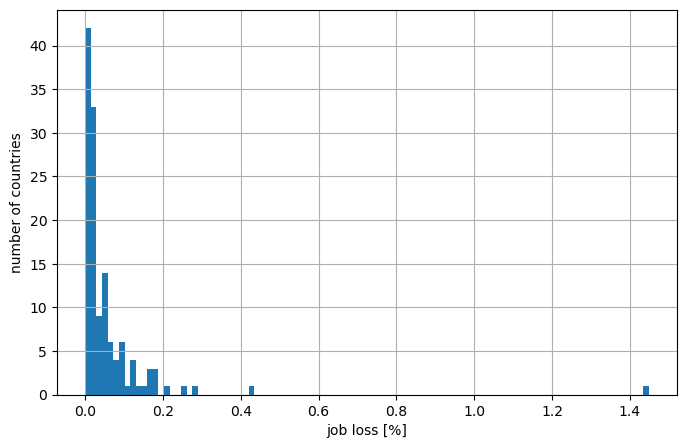

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
job_loss_ctry.hist(bins=100)
ax.set_xlabel('job loss [%]')
ax.set_ylabel('number of countries')

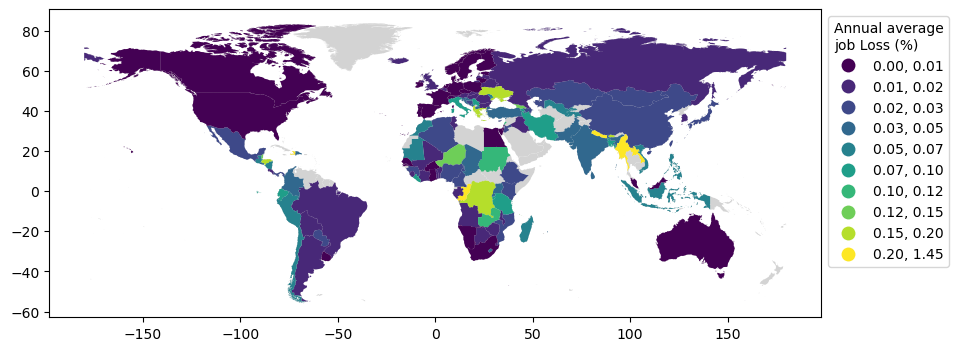

In [11]:
# load WB map shapes
map_shapes = gpd.read_file("../../05_code/UB-global-socioeconomic-resilience/data/WB_shapes/simplified/WB_GAD_ADM0_complete.shp")
adm_0_na_index = map_shapes[map_shapes.ISO_A3.isna()].index
map_shapes.loc[adm_0_na_index, 'ISO_A3'] = [f"XXX-{i}" for i in range(len(adm_0_na_index))]
map_shapes = map_shapes.rename(columns={'ISO_A3': 'iso3'}).dissolve(by='iso3', as_index=True)

# plot job loss data
fig, ax = plt.subplots(figsize=(12, 4))
map_shapes.plot(ax=ax, fc='lightgrey')
gpd.GeoDataFrame(pd.merge(job_loss_ctry, map_shapes, left_index=True, right_index=True)).plot(
    ax=ax, 
    column='job loss [%]', 
    legend=True,
    scheme='UserDefined',
    classification_kwds={'bins': [.01, .02, .03, .05, .075, .1, .125, .15, .2]},
)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 1))  
leg.set_loc("upper left")
leg.set_title("Annual average\njob Loss (%)")